In [162]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [164]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [165]:
data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)

In [166]:
data.neighborhood_id.value_counts()

Malasaña-Universidad, Centro(Madrid)                 390
Almagro, Chamberí(Madrid)                            354
Lavapiés-Embajadores, Centro(Madrid)                 313
El Viso, Chamartín(Madrid)                           312
Bernabéu-Hispanoamérica, Chamartín(Madrid)           307
                                                    ... 
El Plantío, Moncloa(Madrid)                            7
Campo de las Naciones-Corralejos, Barajas(Madrid)      4
Casco Histórico de Barajas, Barajas(Madrid)            2
Timón, Barajas(Madrid)                                 1
Cuatro Vientos, Latina(Madrid)                         1
Name: neighborhood_id, Length: 126, dtype: int64

In [167]:
data = data.loc[data.neighborhood_id=="Lavapiés-Embajadores, Centro(Madrid)"]

In [139]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [140]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [141]:
data.floor.value_counts()

1                       87
3                       69
2                       64
4                       40
Bajo                    32
5                       15
Entreplanta exterior     2
6                        2
Entreplanta interior     1
7                        1
Name: floor, dtype: int64

In [142]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [143]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [144]:
data.floor = pd.to_numeric(data.floor)

In [145]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
12347,"Lavapiés-Embajadores, Centro(Madrid)",0,0,0,71.0,2,1.0,1,1,0,0,0,0,0,0,370000,5211,40.408383,-3.700818
13584,"Lavapiés-Embajadores, Centro(Madrid)",0,0,0,58.0,2,1.0,2,0,0,0,0,0,0,0,235000,4052,40.408383,-3.700818
13586,"Lavapiés-Embajadores, Centro(Madrid)",0,0,0,62.0,1,1.0,5,1,1,0,0,0,0,0,410000,6613,40.408383,-3.700818
13600,"Lavapiés-Embajadores, Centro(Madrid)",0,0,0,74.0,2,1.0,0,1,1,0,0,0,0,0,339000,4581,40.408383,-3.700818
13602,"Lavapiés-Embajadores, Centro(Madrid)",0,0,0,166.0,2,2.0,3,1,1,0,0,0,1,0,899000,5416,40.408383,-3.700818


In [146]:
data.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude'],
      dtype='object')

In [147]:
data = data [['house_type_id', 'is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


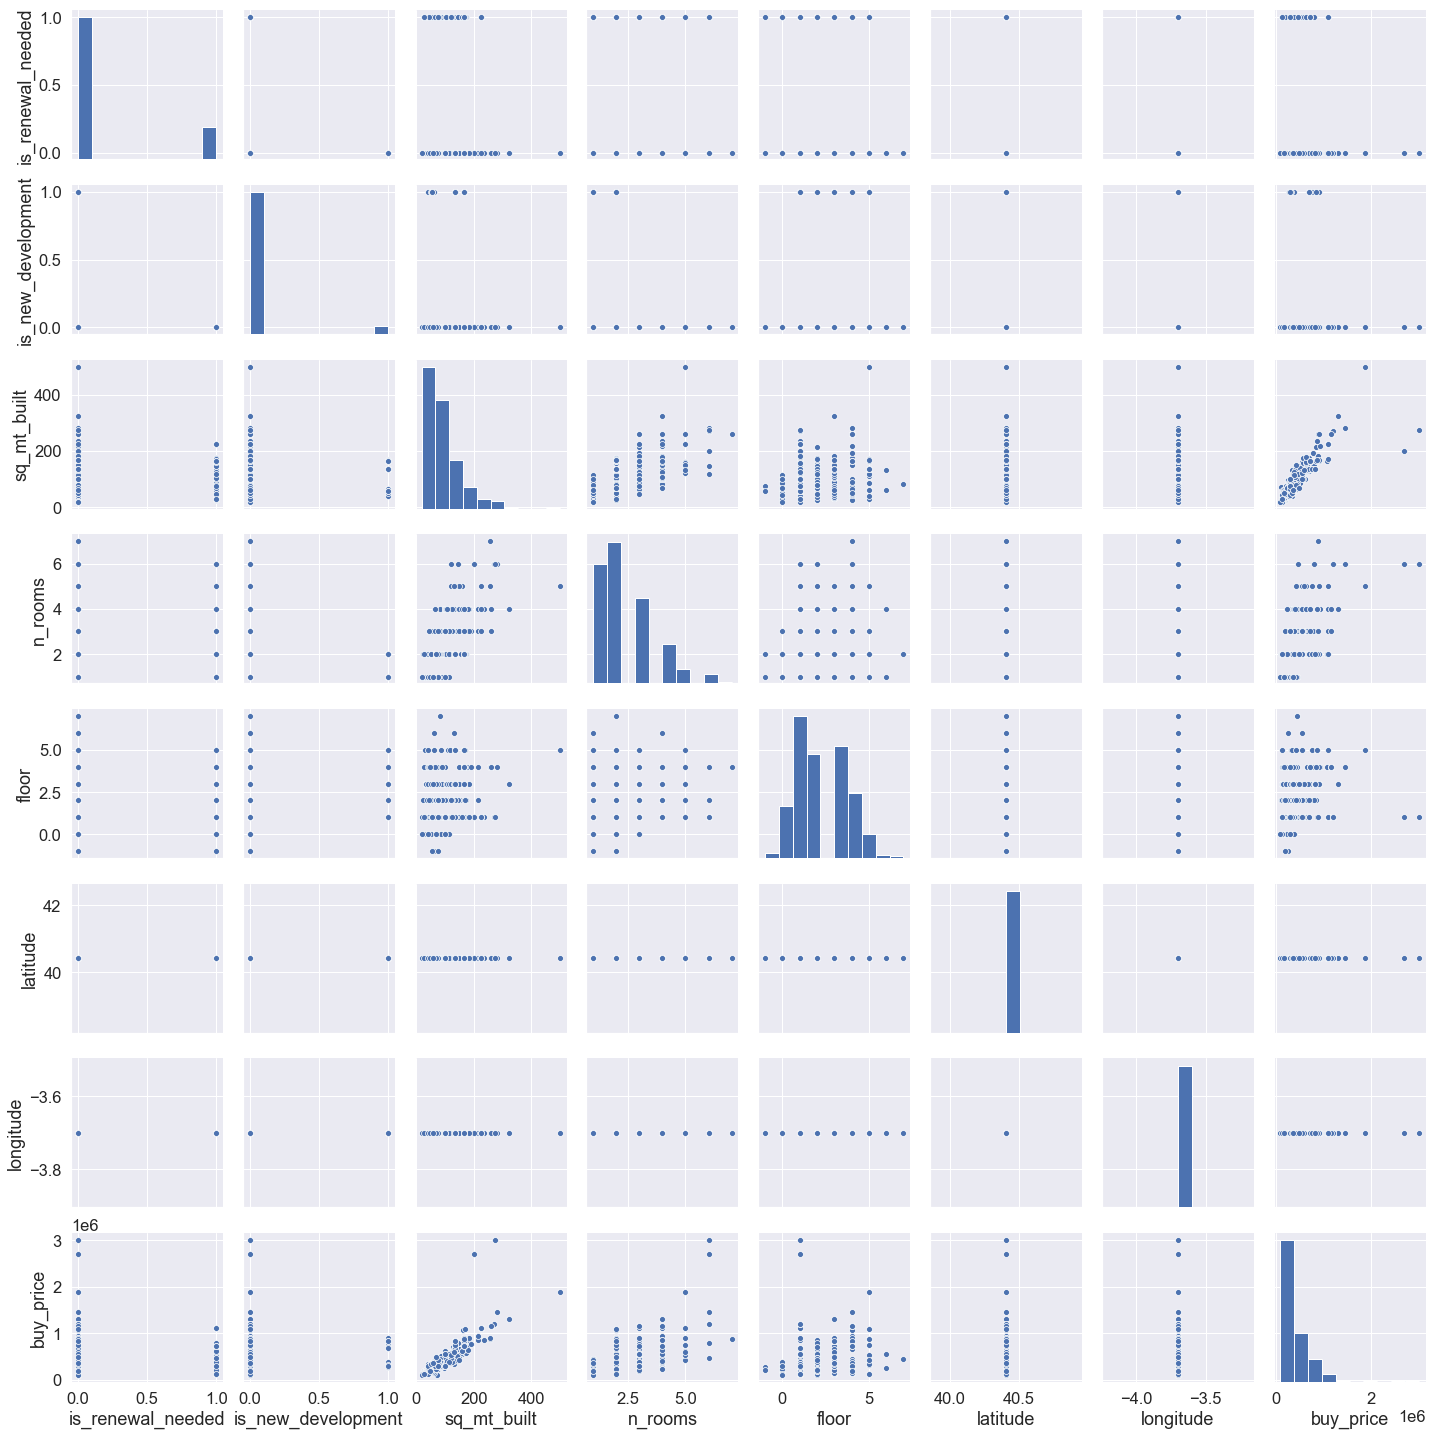

In [148]:
d_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    'floor', 'latitude', 'longitude', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


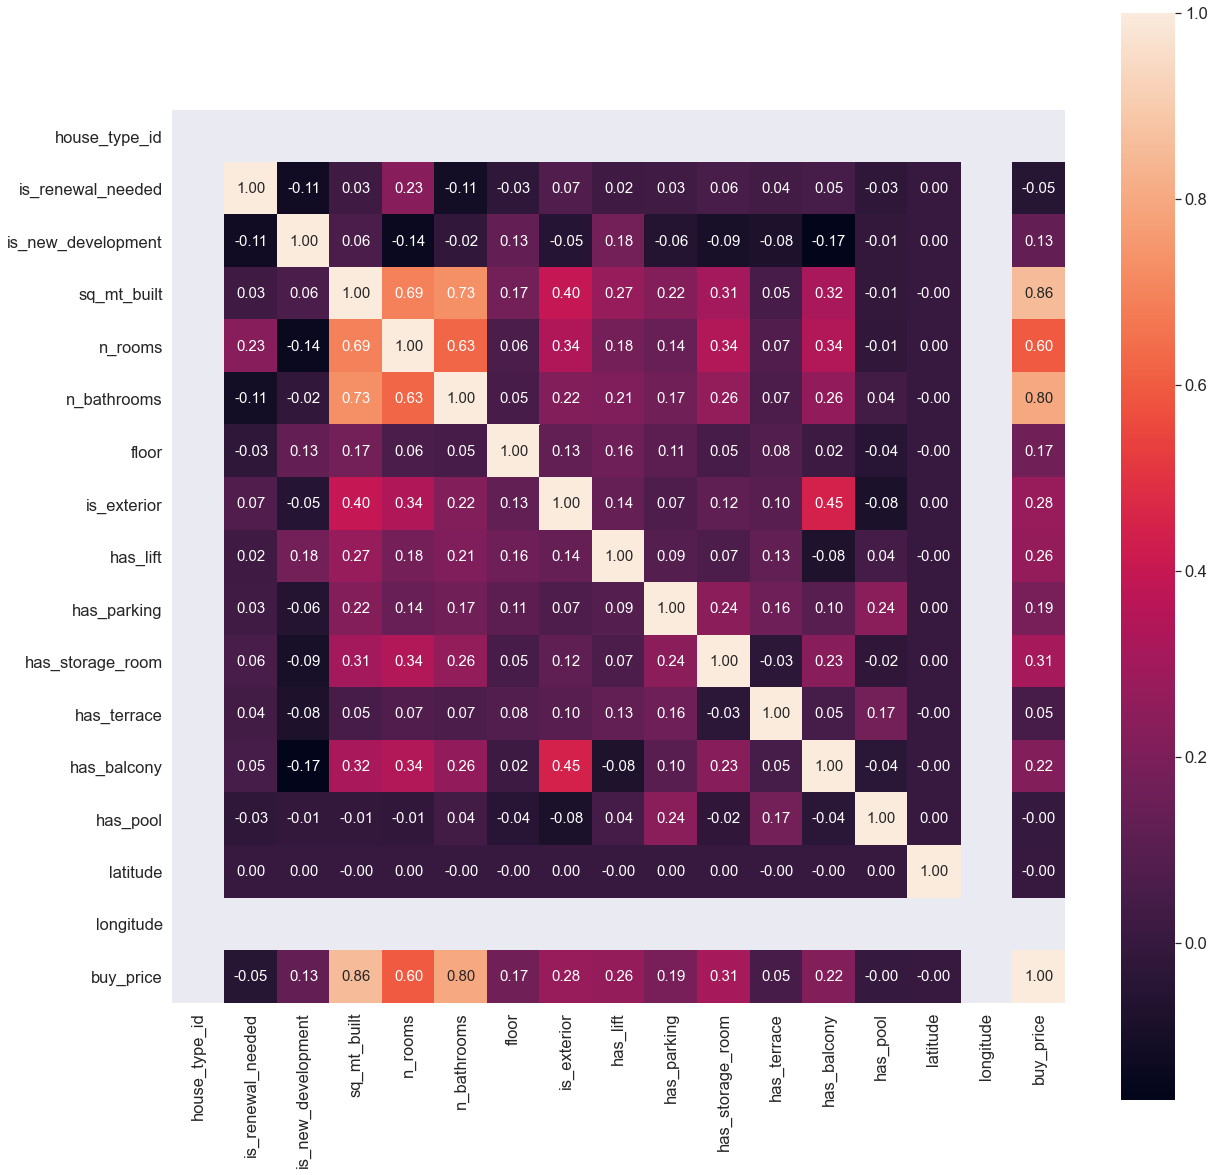

In [149]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

In [150]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
12347,0,0,0,71.0,2,1.0,1,1,0,0,0,0,0,0,40.408383,-3.700818,370000
13584,0,0,0,58.0,2,1.0,2,0,0,0,0,0,0,0,40.408383,-3.700818,235000
13586,0,0,0,62.0,1,1.0,5,1,1,0,0,0,0,0,40.408383,-3.700818,410000
13600,0,0,0,74.0,2,1.0,0,1,1,0,0,0,0,0,40.408383,-3.700818,339000
13602,0,0,0,166.0,2,2.0,3,1,1,0,0,0,1,0,40.408383,-3.700818,899000


In [151]:
data = data [['house_type_id', 'is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

In [152]:
data.describe()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,3.130000e+02,313.000000,3.130000e+02
mean,0.0,0.185304,0.054313,93.003195,2.319489,2.150160,0.686901,0.648562,0.054313,0.13099,0.095847,0.332268,0.003195,4.040838e+01,-3.700818,4.259033e+05
std,0.0,0.389166,0.226997,60.679090,1.240413,1.449959,0.464497,0.478184,0.226997,0.33793,0.294852,0.471781,0.056523,7.116805e-15,0.000000,3.283723e+05
min,0.0,0.000000,0.000000,18.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.040838e+01,-3.700818,9.500000e+04
25%,0.0,0.000000,0.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.040838e+01,-3.700818,2.250000e+05
50%,0.0,0.000000,0.000000,77.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.040838e+01,-3.700818,3.400000e+05
75%,0.0,0.000000,0.000000,117.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,4.040838e+01,-3.700818,5.000850e+05
max,0.0,1.000000,1.000000,500.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4.040838e+01,-3.700818,3.000000e+06


In [153]:
"""clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]"""

'clf = KNN(contamination=0.5, method="largest", algorithm="auto")\nclf.fit(data)\ny_pred = clf.predict(data)\ndropea = data[y_pred == 1]'

In [154]:
#data = data.drop(dropea.index)

In [155]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

In [156]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [158]:
models = {
    "XGBRegressor" : XGBRegressor(objective ='reg:squarederror'),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [159]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado")

Entrenando XGBRegressor
Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado


-------XGBRegressor-------
RMSE 121409.265
R2 0.904
-------DecisionTree-------
RMSE 254410.971
R2 0.579
-------RandomForest-------
RMSE 155831.827
R2 0.842
-------ExtraTrees-------
RMSE 112419.289
R2 0.918
-------GradientBoosting-------
RMSE 110638.854
R2 0.92
-------HistGradientBoosting-------
RMSE 219659.265
R2 0.686
-------Voting-------
RMSE 121636.97
R2 0.904


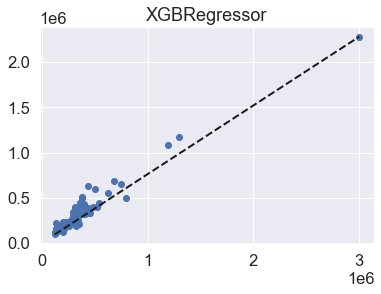

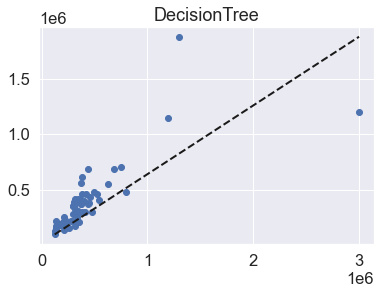

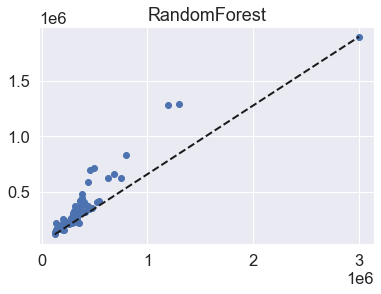

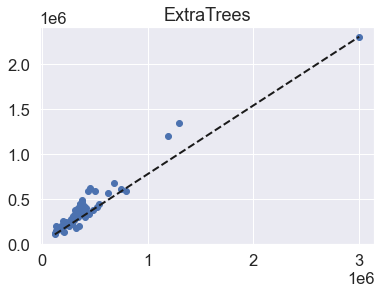

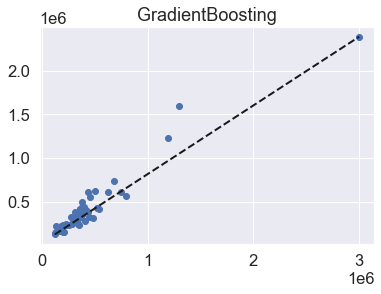

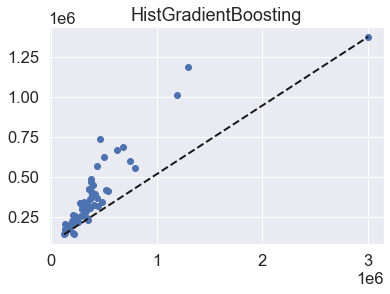

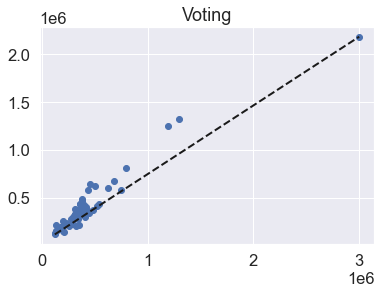

In [160]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)